# 週刊漫画雑誌の分析

`data`にある`wj.json`等のデータを使って遊んでみます．

## 環境構築

```bash
conda env create -f env.yml
```

## 準備
日本語で漫画のタイトルを表示したいので，[matplotlibで日本語を描画 on Ubuntu](http://qiita.com/conta_/items/4b031a44acceb137ec73)を参考に設定します．Ubuntu以外をお使いの方は，適宜ご対応ください．

In [1]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib
from matplotlib.font_manager import FontProperties
font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams['font.family'] = font_prop.get_name()

## クラス定義
雑誌分析用に，`ComicAnalizer`クラスを定義します．

In [18]:
class ComicAnalizer():
    def __init__(self, data_path='data/wj.json', min_week=7, short_week=10):
        self.data = self.read_data(data_path)
        self.all_titles = self.collect_all_titles()
        self.long_titles = self.drop_short_titles(self.all_titles, min_week)
        self.last_year = self.find_last_year(self.long_titles[-100:])
        self.last_no = self.find_last_no(self.long_titles[-100:], self.last_year)
        self.end_titles = self.drop_continued_titles(
            self.long_titles, self.last_year, self.last_no)
        self.short_end_titles = self.drop_long_titles(
            self.end_titles, short_week)
        self.long_end_titles = self.drop_short_titles(
            self.end_titles, short_week + 1)

    def read_data(self, data_path):
        with open(data_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        return data

    def collect_all_titles(self):
        titles = []
        for comic in self.data:
            if comic['title'] not in titles:
                titles.append(comic['title'])
        return titles

    def extract_item(self, title='ONE PIECE', item='worst'):
        return [comic[item] for comic in self.data if comic['title'] == title]

    def drop_short_titles(self, titles, min_week):
        return [title for title in titles
                if len(self.extract_item(title)) >= min_week]

    def drop_long_titles(self, titles, max_week):
        return [title for title in titles
                if len(self.extract_item(title)) <= max_week]

    def find_last_year(self, titles):
        return max([self.extract_item(title, 'year')[-1]
                   for title in titles])

    def find_last_no(self, titles, year):
        return max([self.extract_item(title, 'no')[-1]
                   for title in titles
                   if self.extract_item(title, 'year')[-1] == year])

    def drop_continued_titles(self, titles, year, no):
        end_titles = []
        for title in titles:
            last_year = self.extract_item(title, 'year')[-1]
            if last_year < year:
                end_titles.append(title)
            elif last_year == year:
                if self.extract_item(title, 'no')[-1] < no:
                    end_titles.append(title)
        return end_titles

    def search_title(self, key, titles):
        return [title for title in titles if key in title]

## 使い方

In [19]:
wj = ComicAnalizer()

10週以内で終わった10タイトルの最初の10話分の掲載順を表示してみます．

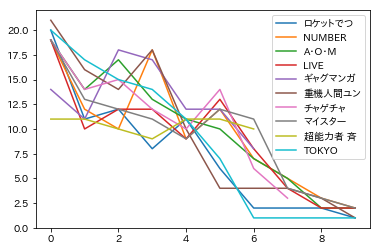

In [20]:
for title in wj.short_end_titles[-10:]:
    plt.plot(wj.extract_item(title)[:50], label=title[:6])
plt.legend()

次は，近年のヒット作の最初の10話分の掲載順を表示します．

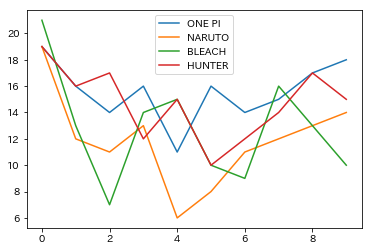

In [21]:
target_titles = ['ONE PIECE', 'NARUTO-ナルト-', 'BLEACH', 'HUNTER×HUNTER']
for title in target_titles:
    plt.plot(wj.extract_item(title)[:10], label=title[:6])
plt.legend()

こうして見ると，ONE PIECEのアベレージが高さがわかります．